<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python </center>

# DSPy1. NumPy basics. Challenge

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-slicing" data-toc-modified-id="Basic-slicing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic slicing</a></span></li><li><span><a href="#A-bit-more-of-slicing" data-toc-modified-id="A-bit-more-of-slicing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A bit more of slicing</a></span></li><li><span><a href="#Working-with-pics" data-toc-modified-id="Working-with-pics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with pics</a></span></li></ul></div>

In [2]:
import numpy as np

## Basic slicing

<img src="slicing.png" style="height: 200px">

Dado el siguiente array 2d:

In [4]:
array2d = np.arange(9).reshape(3,3)
array2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Selecciona cada una de las zonas sombreadas en la imagen superior:

In [5]:
array2d[:2,1:]

array([[1, 2],
       [4, 5]])

In [6]:
array2d[2]

array([6, 7, 8])

In [7]:
array2d[0:,:2]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [8]:
array2d[1,:-1]

array([3, 4])

## A bit more of slicing

* Crea una matriz tamaño n x m de todo ceros, rodeada de 1s. 

In [4]:
n = 4
m = 9
matriz = np.array(([1]*4)+[1,0,0,1]*7+[1]*4).reshape(m,n)
matriz

#matriz2 = np.array(([1]*9)+([1]+[0]*7+[1])*2 +([1]*7)).reshape(4,9)


array([[1, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 1]])

* Crea una matriz con patrón de tablero de ajedrez. Las casillas negras serán 0, las blancas 1.
<img src="chess.png" style="height: 300px">


In [308]:
np.array(([0,1]*4+[1,0]*4)*4).reshape(8,8)

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

## Working with pics

El siguiente código carga una imagen de Internet y la convierte en un array multidimensional:

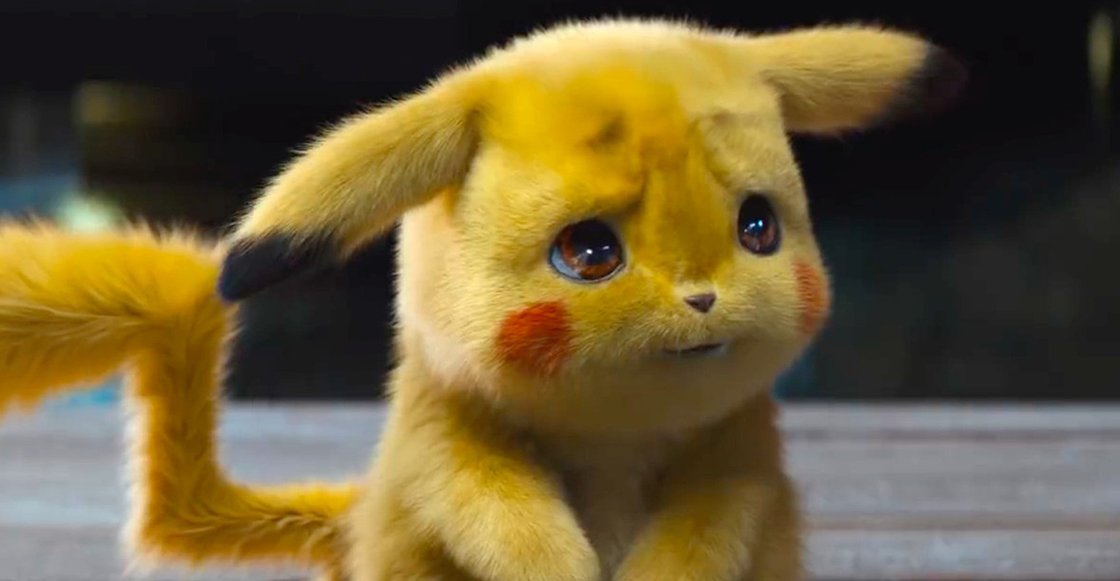

In [225]:
    import imageio
    import PIL

    # Reads the image into RGB numpy array
    img = imageio.imread('https://bit.ly/33iZhPz')

    # Shows the numpy array as a picture
    PIL.Image.fromarray(img)


* ¿Cómo podríamos aplicarle un tinte verde a la imagen?

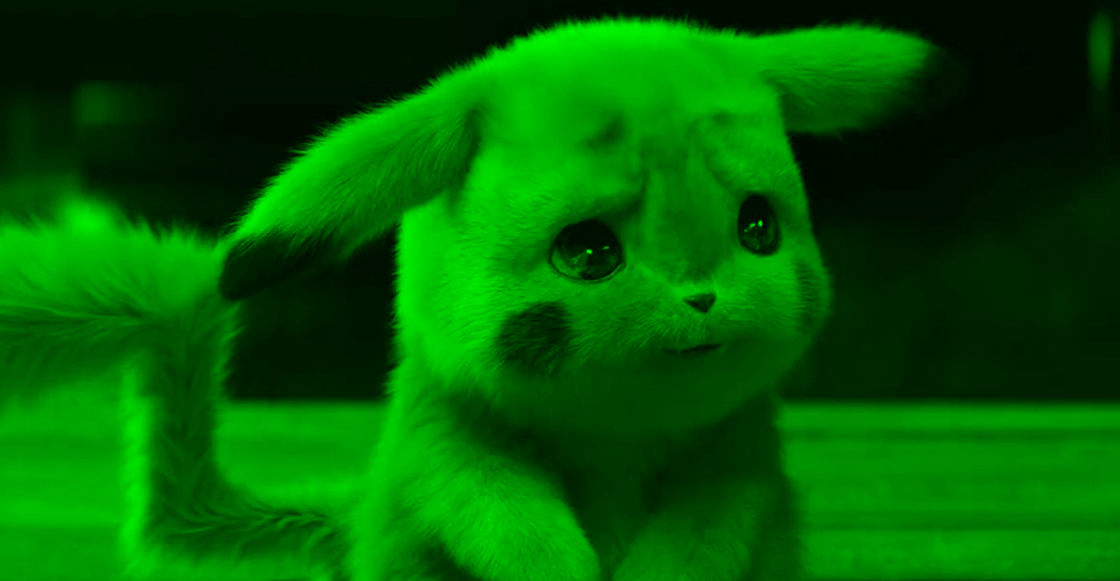

In [306]:
import numpy as np               
img[:,:,0]=0
img[:,:,2]=0
PIL.Image.fromarray(img)

* ¿Cómo la convertiríamos a escala de grises? (sin usar funciones... ¡operando con el array!)

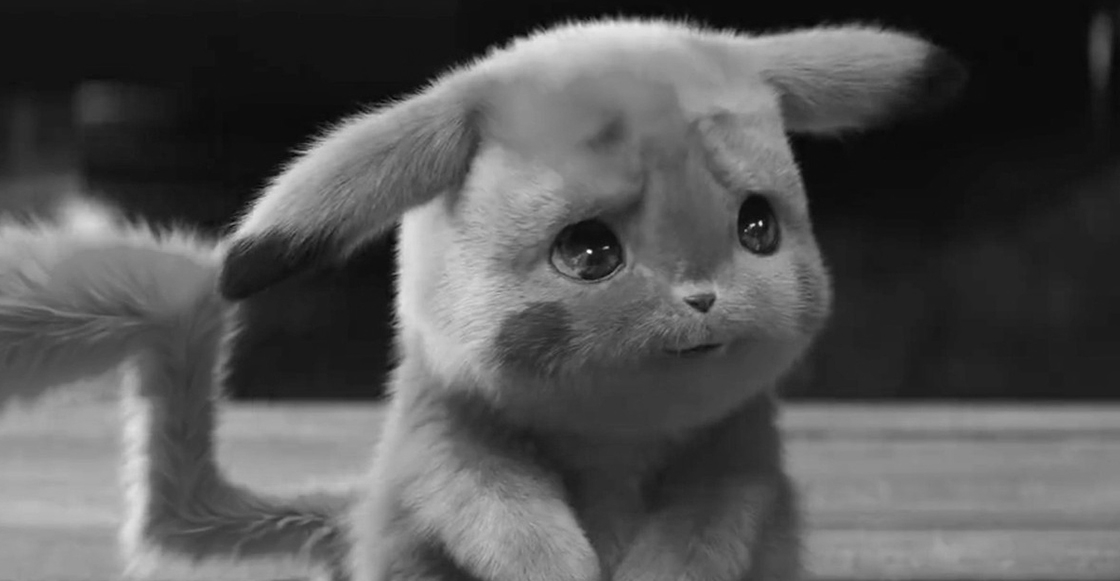

In [319]:
import imageio
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# Reads the image into RGB numpy array
img = imageio.imread('https://bit.ly/33iZhPz')
#Sacamos el promedio RGB en cada valor i,j del array y lo multiplicamos por los valores de luminosidad
#https://en.wikipedia.org/wiki/Grayscale
#gray_image = np.dot((img)/3,[0.2126 , 0.7152, 0.722])
#gray_image = (img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.722) / 3
# Si sumo todo y luego divido tengo overflow, valores mayores de 255
gray_image = (img[:,:,0] * 0.33 + img[:,:,1] *0.33 + img[:,:,2] * 0.33)

# aplicamos el valor a cada componente RGB
img[:,:,0]=img[:,:,1]=img[:,:,2] = gray_image
PIL.Image.fromarray(img)

* Recorta la cara de la imagen. PRO: recorta la cara de la imagen con un círculo

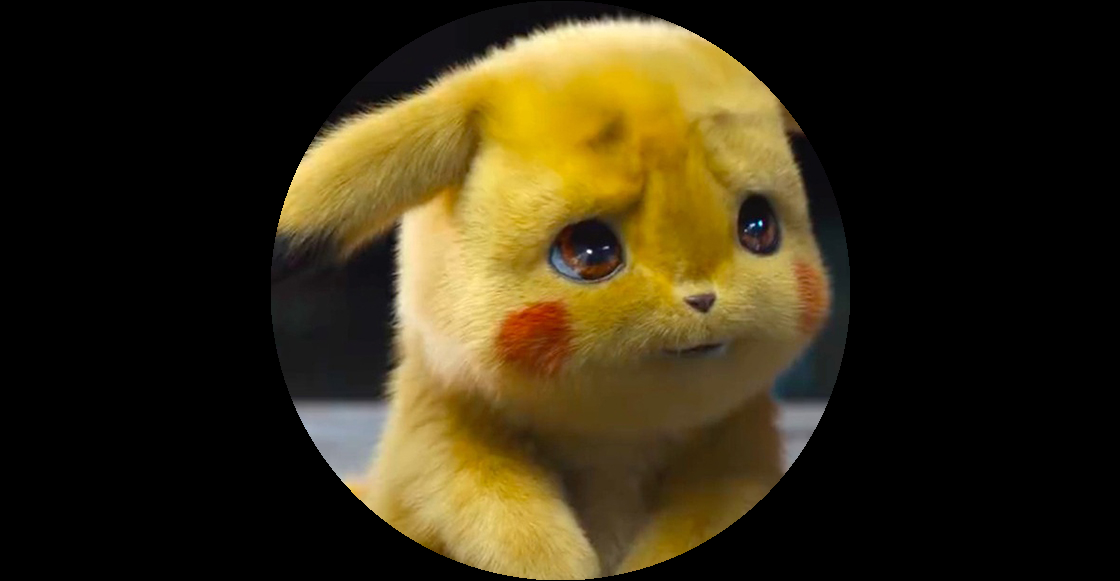

In [302]:
import imageio
import PIL
from PIL import Image
# Reads the image into RGB numpy array
img = imageio.imread('https://bit.ly/33iZhPz')
# alto y ancho de la imagen
alto, ancho = img.shape[:2]
# Centro del circulo
centro = (int(ancho/2), int(alto/2))
# Radio del circulo
radio = min(centro[0], centro[1])
# Con ogrid obtenemos la ubicacion de los pixeles, que nos servira para saber si estan dentro o fuera del circulo 
Y, X = np.ogrid[:alto, :ancho]
# usamos la formula para calcular un punto en relacion con el centro
distancia_centro = np.sqrt((X - centro[0])**2 + (Y-centro[1])**2)
# Si la distancia desde el centro al punto es mayor o igual al radio (fuera)
mascara_circular = distancia_centro >= radio
#Copio la imagen original
imagen_circular = img.copy()
#Pongo a cero todos los valores fuera del circulo
imagen_circular[mascara_circular] = 0
#print(imagen_circular)
PIL.Image.fromarray(imagen_circular)